# Chapter 2: Distributions

## Histograms

One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the **distribution** of the variable.
The most common representation of a distribution is a **histogram**, which is a graph that shows the **frequency** of each value. In this context, “frequency” means the number of times the value appears.

Given the following list could you create a dictionary that counts the frequency of each of the values in it.

In [1]:
import numpy as np
import pandas as pd

In [2]:
a = [1,2,2,3,3,3,4,4,4,4,5,5,6,37,8]

In [3]:
dic = {}
for n in a:
    if n not in dic:
        dic[n] = 0
        for i in a:
            if n == i:
                dic[n] += 1
dic    

{1: 1, 2: 2, 3: 3, 4: 4, 5: 2, 6: 1, 37: 1, 8: 1}

In [4]:
# Better solution
dic = {}
for n in a:
    if n not in dic:
        dic[n] = 0
    dic[n] += 1
dic    

{1: 1, 2: 2, 3: 3, 4: 4, 5: 2, 6: 1, 37: 1, 8: 1}

Create a function that counts the frequency of each of the values in a given list.

In [5]:
def dict_from_list(list):
    dict = {}
    for value in list:
        if value not in dict:
            dict[value] = 0
        dict[value] += 1
    return dict   

Some implemented way in python to get the same result would be the `counter` class defined in the `collections` module or `value_counts` from `pandas`

### Representing histograms

`thinkstats2`module has a histogram class to create hist objects. Import `thinkStats2` and instanciate a `Hist` object called `hist1` with the previous list used:

In [6]:
import thinkstats2

In [7]:
hist1 = thinkstats2.Hist(a)
hist1

Hist({1: 1, 2: 2, 3: 3, 4: 4, 5: 2, 6: 1, 37: 1, 8: 1})

Try the methods `Freq` and `Values` of the `Hist` class and examine the output given by them.

In [8]:
print(hist1.Freq(4))
print()
print(hist1.Values())

4

dict_keys([1, 2, 3, 4, 5, 6, 37, 8])


### Plotting histograms

Given the dictionary result that you got try to plot a histogram using the `matplotlib` library.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

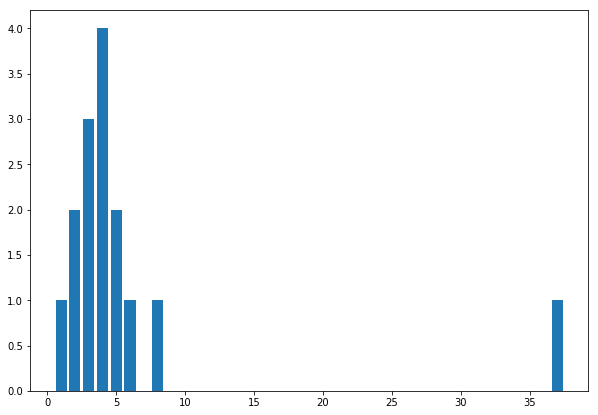

In [10]:
plt.figure(figsize = (10,7))
plt.bar(list(dic.keys()), list(dic.values()))
plt.show()

Now try a module called `thinkplot`(thinkplot.py) that provides functions for plotting. Explore the function `Hist` of module `thinkplot` on the file to see how what it does differs from your function.

In [11]:
import thinkplot

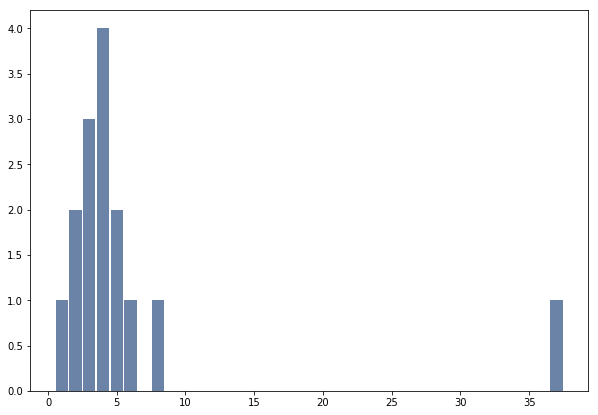

In [12]:
plt.figure(figsize = (10,7))
thinkplot.Hist(hist1)

### Using NSFG Variables

When you start working with a new dataset, I suggest you explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.
In the previous chapter we transformed agepreg from centiyears to years, and combined birthwgt_lb and birthwgt_oz into a single quantity, totalwgt_lb. In this section we will use these variables to demonstrate some features of histograms.

Start by reading the data and selecting all records for live births (outcome = 1):

In [13]:
import nsfg

In [14]:
preg = nsfg.ReadFemPreg(dct_file='../Think_Stats/Thinkstats2/2002FemPreg.dct',
                        dat_file='Thinkstats2/2002FemPreg.dat.gz',
                        clean = True)

In [15]:
preg_alive = preg.loc[preg['outcome'] == 1]

Plot an histagram of the weight value using 2 methods:
- Using the `dict_from_list function` created before
- Using the `pandas` method `value_counts()` - make sure you group them in bins before

In [16]:
preg_alive['totalwgt_lb'] = preg_alive['birthwgt_lb'] + preg_alive['birthwgt_oz']*0.0625
#preg_live['totalwgt_lb'].head(20)

/home/javi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


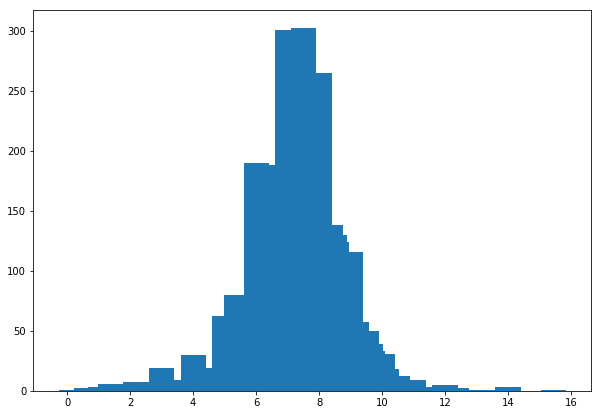

In [17]:
dic = dict_from_list(preg_alive['totalwgt_lb'])

plt.figure(figsize = (10,7))
plt.bar(list(dic.keys()), list(dic.values()))
plt.show()

/home/javi/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


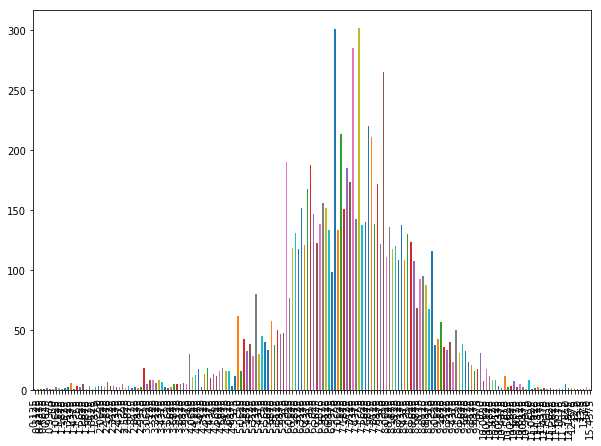

In [18]:
# value_counts()
plt.figure(figsize = (10,7))
preg_alive['totalwgt_lb'].value_counts().sort_index().plot.bar()
plt.show()

Compare the results with the `thinkstats2` `Hist` function.

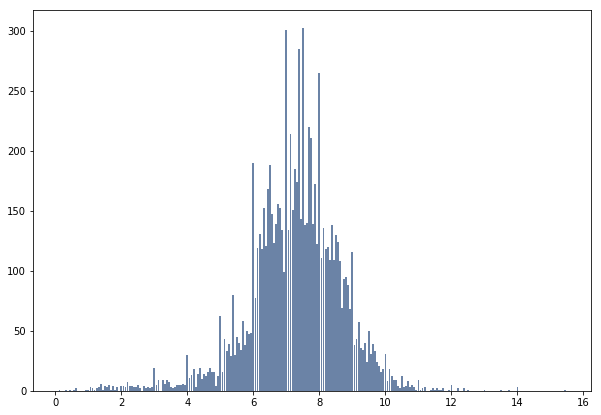

In [19]:
hist2 = thinkstats2.Hist(preg_alive['totalwgt_lb'])

plt.figure(figsize = (10,7))
thinkplot.Hist(hist2)

The most common value, called the **mode**, is 7 pounds. The distribution is approximately bell-shaped, which is the shape of the **normal distribution**, also called a **Gaussian distribution**. But unlike a true normal distribution, this distribution is asymmetric; it has a **tail** that extends farther to the left than to the right.<br>
When all values have the same frequency we call this **uniform distribution**.

Can you think of any variable in the data with a uniform distribution?

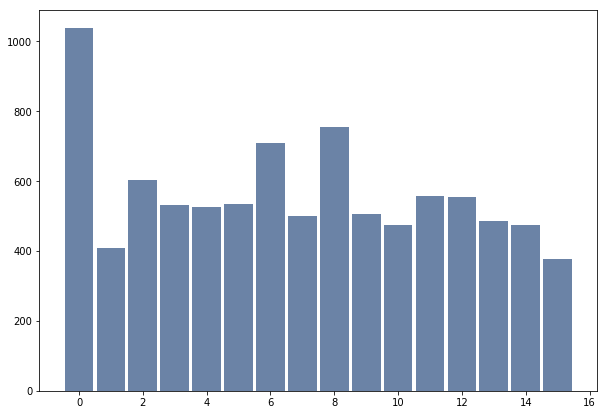

In [20]:
hist3 = thinkstats2.Hist(preg_alive['birthwgt_oz'])

plt.figure(figsize = (10,7))
thinkplot.Hist(hist3)

Show also the histograms of `birthwgt_oz`, `prglngth` and describe the distribution observed.

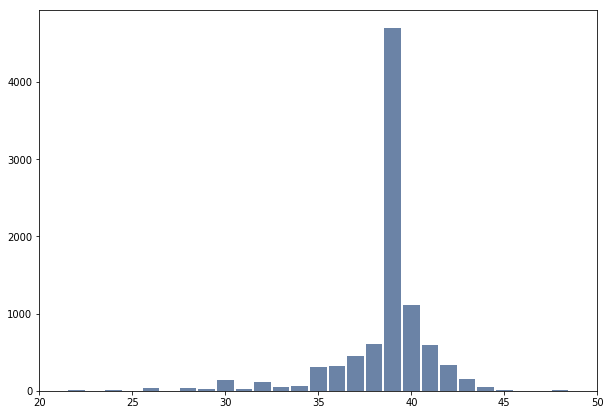

In [21]:
hist4 = thinkstats2.Hist(preg_alive['prglngth'])

plt.figure(figsize = (10,7))
plt.xlim(20, 50)
thinkplot.Hist(hist4)

### Outliers

Looking at histograms, it is easy to identify the most common values and the shape of the distribution, but rare values are not always visible.
Before going on, it is a good idea to check for **outliers**, which are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.

Get me the max and min value and its frequency of the dictionary created at the start of the class and of the `agepreg` creating your own function.

In [22]:
def outliers(dict):
    ind = 0
    for key, value in dic.items():
        if ind == 0:
            max = key
            min = key
            ind = 1
        if key >= max:
            max = key
            freq_max = value
        if key <= min:
            min = key
            freq_min = value
            
    return {'max': max,'freq_max': freq_max,'min': min,'freq_min': freq_min}    

In [23]:
outliers(dic)

{'max': 15.4375, 'freq_max': 1, 'min': 0.125, 'freq_min': 1}

`Hist` provides methods `Largest` and `Smallest`, which take an integer n and return the n largest or smallest values from the histogram:

In [24]:
max = hist2.Largest(n = 1)
min = hist2.Smallest(n = 1)
print(max)
print(min)

[(15.4375, 1)]
[(0.125, 1)]


In the list of pregnancy lengths for live births, the 10 lowest values are [0, 4, 9, 13, 17, 18, 19, 20, 21, 22]. Values below 10 weeks are certainly errors; the most likely explanation is that the outcome was not coded correctly. Values higher than 30 weeks are probably legitimate. Between 10 and 30 weeks, it is hard to be sure; some values are probably errors, but some represent premature babies.<br>

On the other end of the range, Most doctors recommend induced labor if a pregnancy exceeds 42 weeks, so some of the longer values are surprising. In particular, 50 weeks seems medically unlikely.<br>

The best way to handle outliers depends on “domain knowledge”; that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.<br>

In this example, the motivating question is whether first babies tend to be early (or late). When people ask this question, they are usually interested in full-term pregnancies, so for this analysis I will focus on pregnancies longer than 27 weeks.

## First Babies

Now we can compare the distribution of pregnancy lengths for `first_babies` and `others`.

Using `birthord`, divide the dataframe between those first babies and those which are not.

In [25]:
first_babies = preg[(preg['birthord'] == 1) & (preg['outcome'] == 1)]
print(first_babies['birthord'].value_counts(dropna = False))
print()
others = preg[(preg['birthord'] != 1) & (preg['outcome'] == 1)]
print(others['birthord'].value_counts(dropna = False))

1.0    4413
Name: birthord, dtype: int64

2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64


Then plot the 2 histograms on the same axis to see how they compare

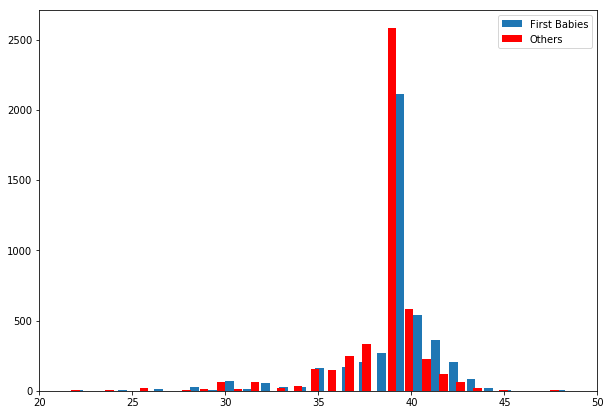

In [26]:
fig = plt.figure(figsize = (10,7))

plt.hist(first_babies['prglngth'], bins = 100, label ='First Babies', align = 'right')
plt.hist(others['prglngth'], bins = 100, color = 'red', label ='Others', align = 'left')

# x = preg1['prglngth']
# y = preg2['prglngth']
# ax = fig.add_subplot(111)
# x.plot(kind ='hist', bins = 103, ax = ax, label ='First Babies', align = 'right')
# y.plot(kind ='hist', bins = 103, ax = ax, color='red', label ='Others', align = 'left')

plt.legend()
plt.xlim(20,50)
plt.show()

Compare the result with the thinkstats plot

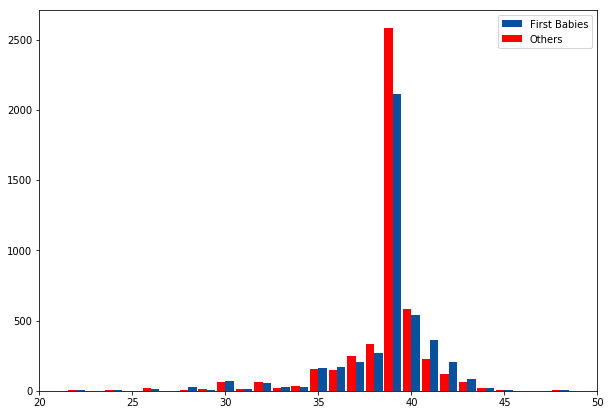

In [27]:
hist5 = thinkstats2.Hist(first_babies['prglngth'])
hist6 = thinkstats2.Hist(others['prglngth'])

plt.figure(figsize = (10,7))

width = 0.45
thinkplot.preplot(2)
thinkplot.hist(hist5, align = 'left', width = width, label ='First Babies', alpha = 1)
thinkplot.hist(hist6, align = 'right',  width = width, color='red', label ='Others', alpha = 1)

plt.xlim(20,50)
plt.legend()
plt.show()

`thinkplot.Hist` normally uses `align=’center’` so that each bar is centered over its value. For this figure, I use `align=’right’` and `align=’left’` to place corresponding bars on either side of the value.

With `width=0.45`, the total width of the two bars is `0.9`, leaving some space between each pair.

Finally, I adjust the axis to show only data between 27 and 46 weeks.

What conclusions can you drawn from the histograms observed?

Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer “first babies” than “others,” so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions.

## Summarizing distributions

A histogram is a complete description of the distribution of a sample; that is, given a histogram, we could reconstruct the values in the sample (although not their order).

If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.

Some of the characteristics we might want to report are:
- central tendency: Do the values tend to **cluster** around a particular point?
- modes: Is there more than one cluster?
- spread: How much variability is there in the values?
- tails: How quickly do the probabilities drop off as we move away from the modes?
- outliers: Are there extreme values far from the modes?

Statistics designed to answer these questions are called **summary statistics**. By far the most common summary statistic is the mean, which is meant to describe the central tendency of the distribution.

If you have a sample of `n` values, `x` `i` , the mean, `x̄`, is the sum of the values divided by the number of values; in other words:

![alt text](notebookpics/mean.png "Title")
***Cram this formula***

The words “mean” and “average” are sometimes used interchangeably, but I make this distinction:
- The **mean** of a sample is the summary statistic computed with the previous formula.
- An **average** is one of several summary statistics you might choose to describe a central tendency.

Sometimes the mean is a good description of a set of values. For example, apples are all pretty much the same size (at least the ones sold in supermarkets). So if I buy 6 apples and the total weight is 3 pounds, it would be a
reasonable summary to say they are about a half pound each.

But pumpkins are more diverse. Suppose I grow several varieties in my garden, and one day I harvest three decorative pumpkins that are 1 pound each, two pie pumpkins that are 3 pounds each, and one Atlantic Giant 
that weighs 591 pounds. The mean of this sample is 100 pounds, but if I told you “The average pumpkin in my garden is 100 pounds,” that would be misleading. In this example, there is no meaningful average because there is 
no typical pumpkin.

Calculate the mean of the initial list created `a` and of the `prglngth` of the babies that survived with your own methods:

In [28]:
def jmean(lorser):
    return sum(lorser)/len(lorser)

print("a mean:",jmean(a))
print('prglngth mean:', jmean(preg_alive.prglngth))

a mean: 6.066666666666666
prglngth mean: 38.56055968517709


Compare your results it with the `numpy` `mean` function

In [29]:
print("a mean:",np.mean(a))
print('prglngth mean:', np.mean(preg_alive.prglngth))

a mean: 6.066666666666666
prglngth mean: 38.56055968517709


## Variance

If there is no single number that summarizes pumpkin weights, we can do a little better with two numbers: mean and **variance**.
Variance is a summary statistic intended to describe the variability or spread of a distribution. The variance of a set of values is:
![alt text](notebookpics/variance.png "Title")
**Cram this formula**

The term x i − x̄ is called the “deviation from the mean,” so variance is the mean squared deviation. The square root of variance, S, is the **standard deviation**.

If you have prior experience, you might have seen a formula for variance with n − 1 in the denominator, rather than n. This statistic is used to estimate the variance in a population using a sample. We will come back to this in
Chapter 8.

Calculate the Variance and standard deviation of the initial list created `a` and of the `prglngth` of the babies that survived with your own methods:

In [30]:
def jvariance(listorserie):
    return 1/len(listorserie)*sum([(x - jmean(listorserie))**2 for x in listorserie])

print("a variance:", jvariance(a))
print('prglngth variance:', jvariance(preg_alive.prglngth))

print("a standard deviation:", np.sqrt(jvariance(a)))
print('prglngth standard deviation:', np.sqrt(jvariance(preg_alive.prglngth)))

a variance: 71.1288888888889
prglngth variance: 7.301863788195475
a standard deviation: 8.433794453796517
prglngth standard deviation: 2.702196104688828


Use `pandas` methods `.mean()` `.var()` `.std()` to compare your results

In [31]:
print("a variance:", np.var(a))
print('prglngth variance:', np.var(preg_alive.prglngth))

print("a standard deviation:", np.std(a))
print('prglngth standard deviation:', np.std(preg_alive.prglngth))

a variance: 71.1288888888889
prglngth variance: 7.301863788195441
a standard deviation: 8.433794453796517
prglngth standard deviation: 2.702196104688822


For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common.
Variance of pregnancy length is 7.3, which is hard to interpret, especially since the units are weeks 2 , or “square weeks.” Variance is useful in some calculations, but it is not a good summary statistic.

## Effect Size

An **effect size** is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

Another way to convey the size of the effect is to compare the difference between groups to the variability within groups. Cohen’s d is a statistic intended to do that; it is defined:

![alt text](notebookpics/cohen.png "Title")
**Cram this formula**

Compute Cohen’s d of prglngth between:
- the babies that survived and those who didn't
- first babies and those who are not.

With your own methods:

In [32]:
preg_dead = preg.loc[preg['outcome'] != 1]

In [33]:
m3 = jmean(preg_alive['prglngth'])
m4 = jmean(preg_dead['prglngth'])

n3 = len(preg_alive['prglngth'])
n4 = len(preg_dead['prglngth'])

v3 = jvariance(preg_alive['prglngth'])
v4 = jvariance(preg_dead['prglngth'])

denom = np.sqrt((n3*v3 + n4*v4)
               /
               (n3 + n4))
d_survived = (m3 - m4)/denom
print(d_survived)

5.794689766280667


In [34]:
m1 = jmean(first_babies['prglngth'])
m2 = jmean(others['prglngth'])

n1 = len(first_babies['prglngth'])
n2 = len(others['prglngth'])

v1 = jvariance(first_babies['prglngth'])
v2 = jvariance(others['prglngth'])

denom = np.sqrt((n2*v2 + n1*v1)
               /
               (n1 + n2))

d_prglng_fo = (m1 - m2)/denom
print(d_prglng_fo)

0.028882209288160925


In [35]:
from numpy import mean, sqrt, std

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

d_prglng_fo = cohen_d(first_babies['prglngth'], others['prglngth'])
print(d_prglng_fo)

d_survived = cohen_d(preg_alive['prglngth'], preg_dead['prglngth'])
print(d_survived)

0.028879051899871788
5.794263451049945


## Reporting results

We have seen several ways to describe the difference in pregnancy length (if there is one) between first babies and others. How should we report these results?

The answer depends on who is asking the question. A scientist might be interested in any (real) effect, no matter how small. A doctor might only care about effects that are **clinically significant**; that is, differences that
affect treatment decisions. A pregnant woman might be interested in results that are relevant to her, like the probability of delivering early or late.

How you report results also depends on your goals. If you are trying to demonstrate the importance of an effect, you might choose summary statistics that emphasize differences. If you are trying to reassure a patient, you
might choose statistics that put the differences in context.

Of course your decisions should also be guided by professional ethics. It’s ok to be persuasive; you should design statistical reports and visualizations that tell a story clearly. But you should also do your best to make your reports honest, and to acknowledge uncertainty and limitations.

## Exercises

### 1)
Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.

Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?

Finally, imagine that you are Cecil Adams, author of [The Straight Dope](http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

**SOLUTION**
- For being on the news, I would use the histograms in percentage of prglngth for first babies and others and the histograms of the babies weight.
- For calm down an anxious patient, I would use also the histograms because to show her/him the wide variety of cases, because she/he might not understand the standard deviation.
- With the current data we don't have enough information to can insure that there is a significant difference, in order to achieve this we should make new histograms in percentage.

### 2)
Do the following coding exercises:
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

/home/javi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/javi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


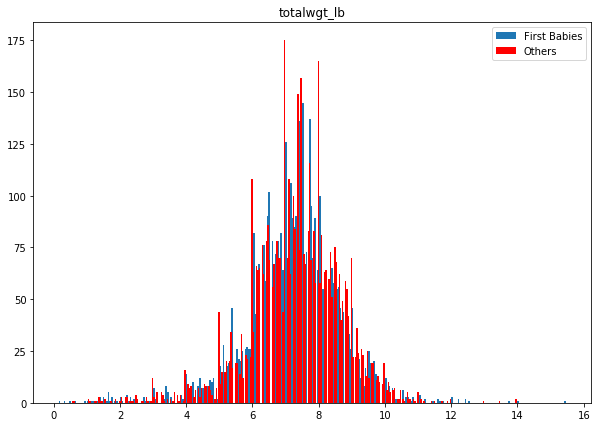

In [36]:
plt.figure(figsize = (10,7))

plt.hist(first_babies['totalwgt_lb'], bins = 300, label ='First Babies', align = 'right')
plt.hist(others['totalwgt_lb'], bins = 300, label ='Others', align = 'left', color ='r')

plt.legend()
plt.title('totalwgt_lb')
plt.show()

In [37]:
d_wgt_fo = cohen_d(first_babies['totalwgt_lb'], others['totalwgt_lb'])

print('d pregnancy length:', d_prglng_fo)
print('d weight:', d_wgt_fo)

d pregnancy length: 0.028879051899871788
d weight: -0.08867293347226901


In this case, the difference between the two groups is much smaller. Before qwe saw a difference of 1.06 std, and now we are seeing a difference of -0.08 std, wich is 92% less

For the next few exercises, we'll load the respondent file:

In [38]:
resp = nsfg.ReadFemResp(dct_file='../Think_Stats/Thinkstats2/2002FemResp.dct',
                        dat_file='Thinkstats2/2002FemResp.dat.gz', 
                        clean = True)

In [39]:
# resp.head()

Make a histogram of `totincr` the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

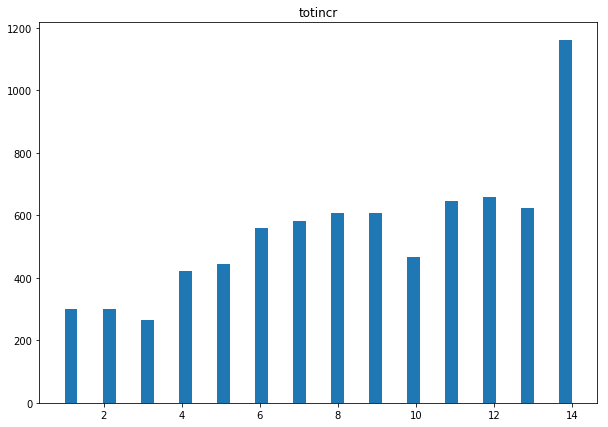

In [40]:
plt.figure(figsize = (10,7))

plt.hist(resp['totincr'], bins = 40)

plt.title('totincr')

plt.show()

Make a histogram of `age_r`, the respondent's age at the time of interview.

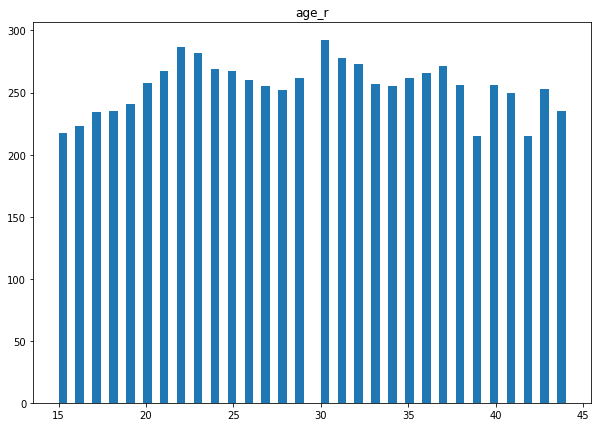

In [41]:
plt.figure(figsize = (10,7))

plt.hist(resp['age_r'], bins = 60)

plt.title('age_r')

plt.show()

Make a histogram of `numfmhh`, the number of people in the respondent's household.

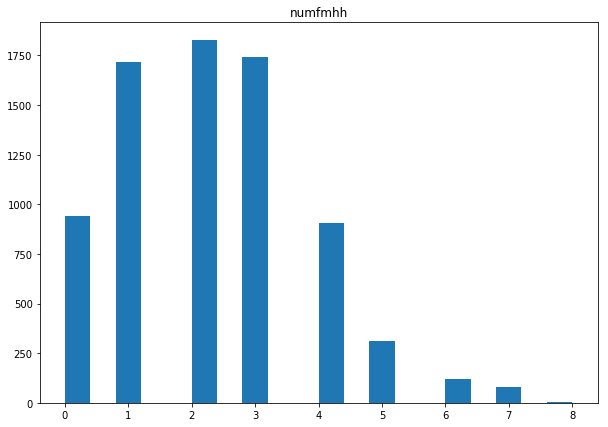

In [42]:
plt.figure(figsize = (10,7))

plt.hist(resp['numfmhh'], bins = 20)

plt.title('numfmhh')

plt.show()

Make a histogram of `parity`, the number of children borne by the respondent.  How would you describe this distribution?

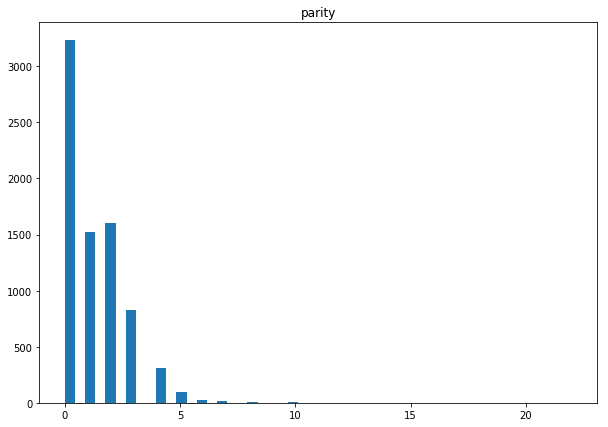

In [43]:
plt.figure(figsize = (10,7))

plt.hist(resp['parity'], bins = 50)

plt.title('parity')

plt.show()

Use `Hist.Largest` to find the largest values of `parity`.

In [44]:
hist7 = thinkstats2.Hist(resp['parity'])
hist7.Largest(n = 1)

[(22, 1)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use `totincr` to select the respondents with the highest income (level 14).  Plot the histogram of `parity` for just the high income respondents.

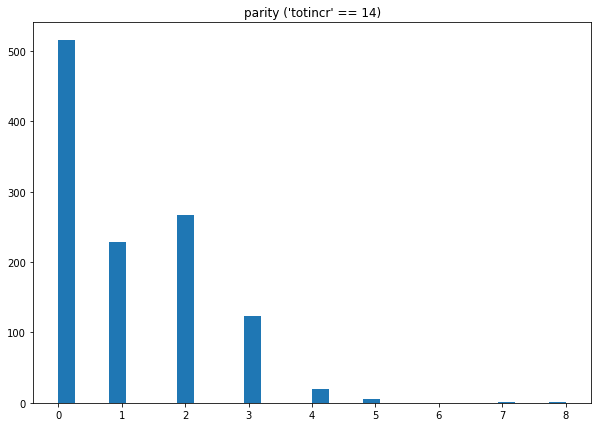

In [45]:
resp1 = resp.loc[resp['totincr'] == 14]

plt.figure(figsize = (10,7))

plt.hist(resp1['parity'], bins = 30)

plt.title('parity (\'totincr\' == 14)')

plt.show()

Find the largest parities for high income respondents.

In [46]:
hist8 = thinkstats2.Hist(resp1['parity'])
hist8.Largest(n = 1)

[(8, 1)]

Compare the mean `parity` for high income respondents and others.

In [47]:
resp2 = resp.loc[resp['totincr'] != 14]

print('High income mean parity:', np.mean(resp1['parity']))
print('Others mean parity:', np.mean(resp2['parity']))
print('Difference:', np.mean(resp2['parity']) - np.mean(resp1['parity']))

High income mean parity: 1.0758620689655172
Others mean parity: 1.2495758136665125
Difference: 0.17371374470099532


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [48]:
d_pa_hio = cohen_d(resp1['parity'], resp2['parity'])

print('d parity hio:', d_pa_hio)
print('d pregnancy length fo:', d_prglng_fo)

d parity hio: -0.12511665513356832
d pregnancy length fo: 0.028879051899871788


The difference on the parity between high income and others is 6 times biger than the difference in pregnancy length for first babies and others.

### 3)
The mode of a distribution is the most frequent value; see http://wikipedia.org/wiki/Mode_(statistics). Write a function called Mode that takes a Hist and returns the most frequent value.

As a more challenging exercise, write a function called AllModes that returns a list of value-frequency pairs in descending order of frequency.

In [49]:
hist1

Hist({1: 1, 2: 2, 3: 3, 4: 4, 5: 2, 6: 1, 37: 1, 8: 1})

In [50]:
def mode(hist):
    mode_fq = 0
    for key in hist:
        if hist[key] > mode_fq:
            mode = key
            mode_fq = hist[key]
    return (mode, mode_fq)
            
mode(hist1)

(4, 4)

In [51]:
def AllModes(hist):
    listoftuples = []
    for i in range(0, len(hist)):
        listoftuples.append(mode(hist))
        del hist[mode(hist)[0]]
    return listoftuples
            
AllModes(hist1)

[(4, 4), (3, 3), (2, 2), (5, 2), (1, 1), (6, 1), (37, 1), (8, 1)]

### 4) 
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Plot the comparative histograms and Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

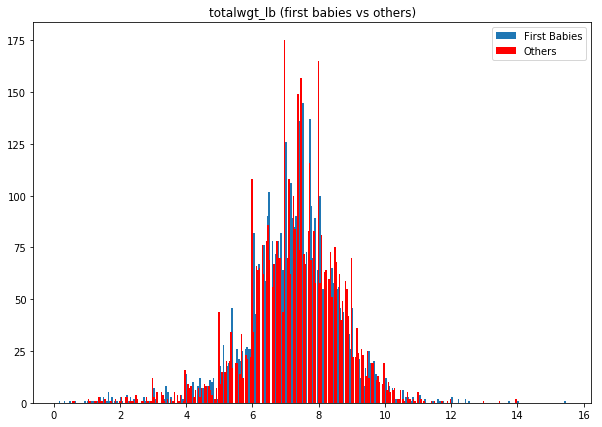

In [52]:
fig = plt.figure(figsize = (10,7))

plt.hist(first_babies['totalwgt_lb'], bins = 300, label ='First Babies', align = 'right')
plt.hist(others['totalwgt_lb'], bins = 300, color = 'red', label ='Others', align = 'left')

plt.legend()
plt.title('totalwgt_lb (first babies vs others)')
plt.show()

In [53]:
print('First babies mean totalwgt_lb:', mean(first_babies['totalwgt_lb']))
print('Others mean totalwgt_lb:', mean(others['totalwgt_lb']))
print('Difference:', mean(first_babies['totalwgt_lb']) - mean(others['totalwgt_lb']))

First babies mean totalwgt_lb: 7.201094430437772
Others mean totalwgt_lb: 7.325855614973262
Difference: -0.12476118453549034


In [54]:
# Last part already made it in cell 35

######                                    Javier Fernández Suárez